In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

data = pd.read_csv("Youtube01-Psy.csv")
print(data.sample(5))

                                      COMMENT_ID                AUTHOR  \
168        z13udh04hqjeyney404cgloh0vbegbmgvq40k               fad lad   
11             z13xit5agm2zyh4f523rst2gowmbx5bml           Lone Twistt   
178        z124y1czouyechz4j04citox1mn1wz5pmos0k  YoungBrothersRecords   
1    LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A           adam riyati   
23         z12ntlcqht2bvjewi04cf1up0xjvs5lq3mc0k              Owen Lai   

                    DATE                                            CONTENT  \
168  2014-11-06T18:24:19  http://www.amazon.co.uk/gp/offer-listing/B00EC...   
11   2013-11-28T17:34:55   Once you have started reading do not stop. If...   
178  2014-11-06T23:22:32  Please give us a chance and check out the new ...   
1    2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
23   2013-12-01T04:51:52                           just checking the views﻿   

     CLASS  
168      1  
11       1  
178      1  
1        1  
23       0  


In [2]:
data = data[["CONTENT", "CLASS"]]
print(data.sample(5))


                                               CONTENT  CLASS
109  8 million likes xD even the subscribers not 8 ...      0
181                        Please check out my vidios﻿      1
4              watch?v=vtaRGgvGtWQ   Check this out .﻿      1
12                https://twitter.com/GBphotographyGB﻿      1
53   https://www.facebook.com/pages/Brew-Crew-2014/...      1


In [3]:
data["CLASS"] = data["CLASS"].map({0: "Not Spam",
                                   1: "Spam Comment"})
print(data.sample(5))


                                               CONTENT         CLASS
172           For Christmas Song visit my channel! ;)﻿  Spam Comment
234  What Can i say....This Song He Just Change The...      Not Spam
125                                Great music anyway﻿      Not Spam
168  http://www.amazon.co.uk/gp/offer-listing/B00EC...  Spam Comment
144  CHECK MY CHANNEL OUT PLEASE. I DO SINGING COVERS﻿  Spam Comment


In [4]:
x = np.array(data["CONTENT"])
y = np.array(data["CLASS"])

cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

model = BernoulliNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))


0.9857142857142858


In [5]:
sample = "Check this out: https://thecleverprogrammer.com/" 
data = cv.transform([sample]).toarray()
print(model.predict(data))


['Spam Comment']


In [6]:
sample = "Lack of information!" 
data = cv.transform([sample]).toarray()
print(model.predict(data))


['Not Spam']


In [9]:
import pandas as pd

# Assuming your dataset is named 'Youtube01-Psy.csv'
df = pd.read_csv('Youtube01-Psy.csv')
print(df.columns)


Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')


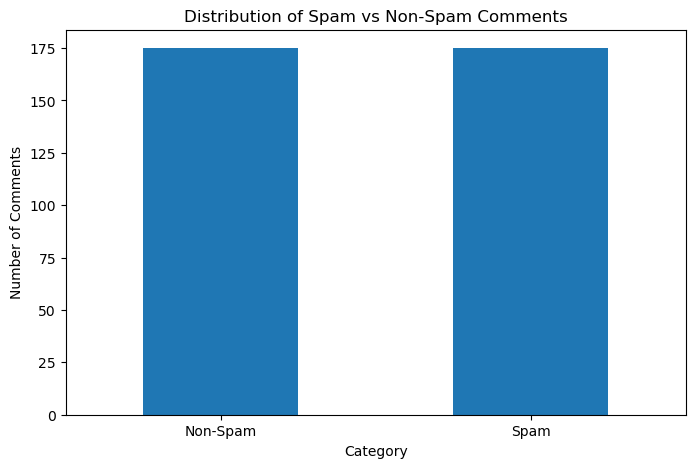

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Youtube01-Psy.csv')
spam_counts = df['CLASS'].value_counts()

plt.figure(figsize=(8, 5))
spam_counts.plot(kind='bar')
plt.title('Distribution of Spam vs Non-Spam Comments')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'], rotation=0)
plt.show()


In [12]:
pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


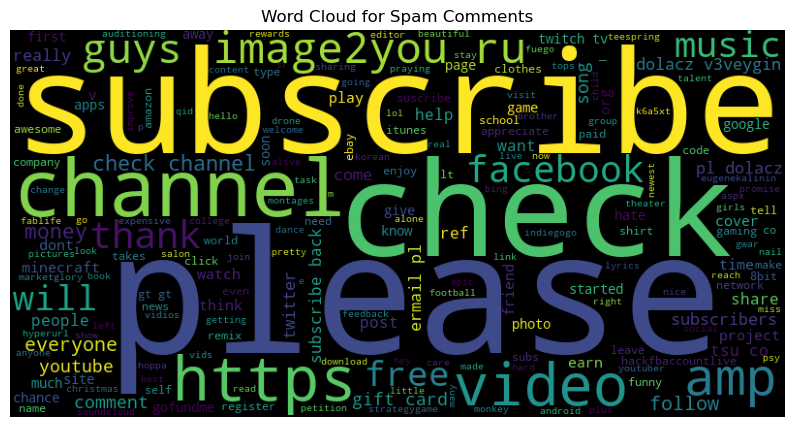

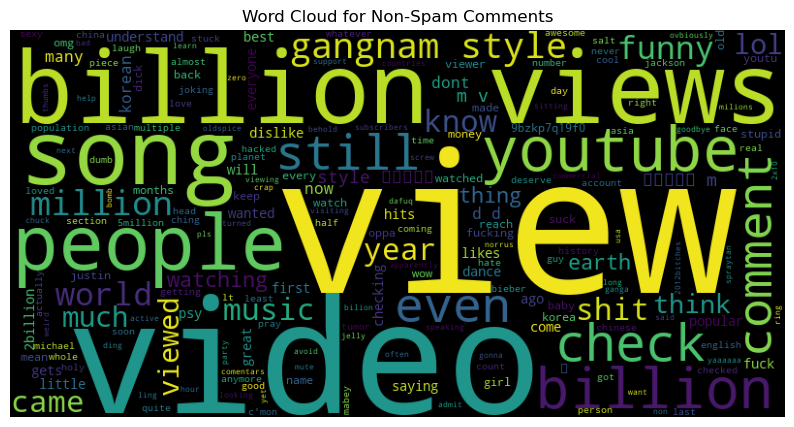

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def preprocess_text(text):
    stopwords = set(STOPWORDS)
    if isinstance(text, str):
        words = text.lower().split()
        words = [w for w in words if w not in stopwords and len(w) > 3]
        return " ".join(words)
    else:
        return ""

spam_comments = df[df['CLASS'] == 1]['CONTENT'].apply(preprocess_text).str.cat(sep=' ')
non_spam_comments = df[df['CLASS'] == 0]['CONTENT'].apply(preprocess_text).str.cat(sep=' ')

plt.figure(figsize=(10, 6))
spam_wordcloud = WordCloud(width=800, height=400, background_color ='black').generate(spam_comments)
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.title('Word Cloud for Spam Comments')
plt.show()


plt.figure(figsize=(10, 6))
non_spam_wordcloud = WordCloud(width=800, height=400, background_color ='black').generate(non_spam_comments)
plt.imshow(non_spam_wordcloud)
plt.axis('off')
plt.title('Word Cloud for Non-Spam Comments')
plt.show()


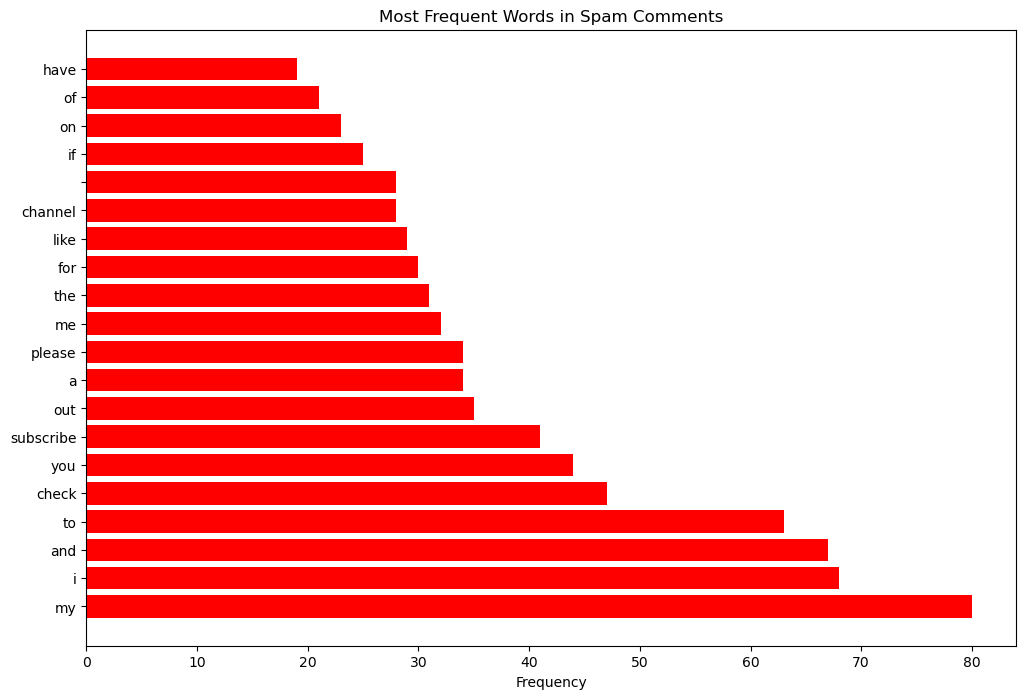

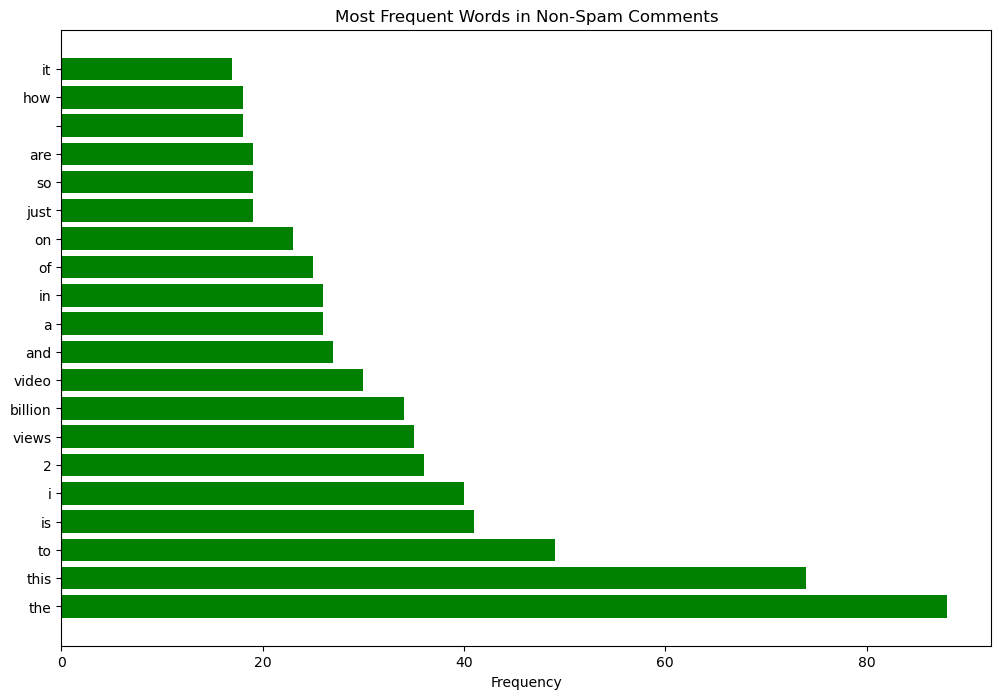

In [16]:
from collections import Counter
import numpy as np

def get_most_common_words(series, n_most_common=20):
    all_words = series.str.lower().str.split(expand=True).stack()
    most_common_words = Counter(all_words).most_common(n_most_common)
    return pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])


spam_words = get_most_common_words(df[df['CLASS'] == 1]['CONTENT'])
non_spam_words = get_most_common_words(df[df['CLASS'] == 0]['CONTENT'])

plt.figure(figsize=(12, 8))
plt.barh(spam_words['Word'], spam_words['Frequency'], color='red')
plt.xlabel('Frequency')
plt.title('Most Frequent Words in Spam Comments')
plt.show()


plt.figure(figsize=(12, 8))
plt.barh(non_spam_words['Word'], non_spam_words['Frequency'], color='green')
plt.xlabel('Frequency')
plt.title('Most Frequent Words in Non-Spam Comments')
plt.show()


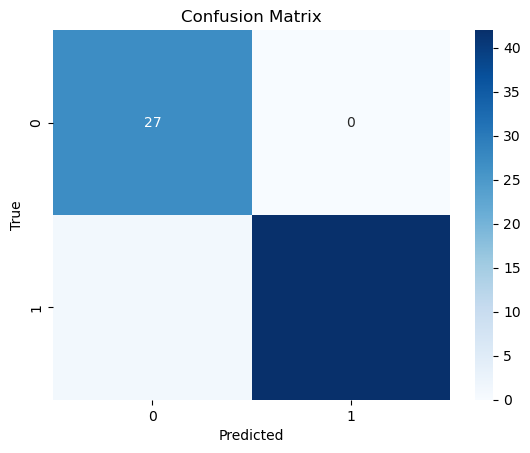

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['CONTENT'], df['CLASS'], test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(X_train_counts, y_train)

# Making predictions
y_pred = model.predict(X_test_counts)

# Now you can plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


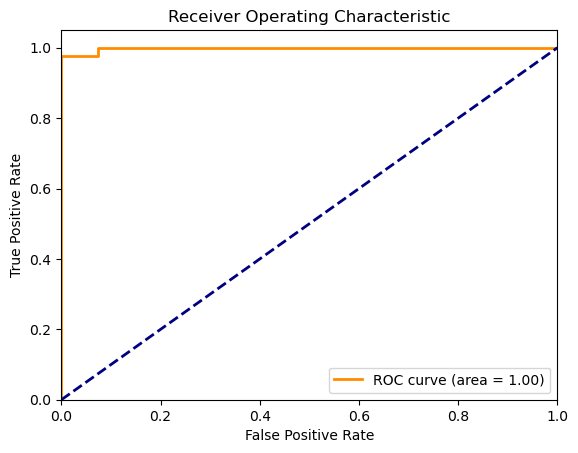

In [22]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_counts)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
